In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [292]:
filename="Algerian_forest_fires_dataset_UPDATE.csv"
df = pd.read_csv(filename, header=1, skiprows=[2])

In [293]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
1,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
2,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
3,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
4,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire


Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€


In [294]:
df.shape

(245, 14)

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          245 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 26.9+ KB


In [296]:
df.drop_duplicates(subset=df.columns[1:], inplace=True)

In [297]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
1,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
2,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
3,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
4,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire


In [298]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
1,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
2,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
3,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
4,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire


In [299]:
df.shape

(245, 14)

In [300]:
df = df.rename(columns={'Classes  ': 'Classes'})
df = df.rename(columns={' RH': 'RH'})
df = df.rename(columns={' Ws': 'WS'})
df = df.rename(columns={'Rain ': 'Rain'})

In [301]:
df['BUI'].unique()

array(['3.9', '2.7', '1.7', '7', '10.9', '13.5', '10.5', '12.6', '15.8',
       '17.7', '6.7', '4.4', '3', '2.2', '1.6', '2.4', '5.3', '5.1',
       '8.4', '9.7', '11.5', '14.9', '18.3', '21.6', '25.8', '29.7',
       '23.8', '28.3', '2.9', '2.8', '5.7', '9.1', '12.5', '12.1', '15.4',
       '7.4', '5.8', '8.1', '9.2', '11.7', '5.9', '8.3', '11.1', '14.2',
       '18.2', '16.5', '22.4', '21.7', '14.7', '18.5', '23.9', '29.4',
       '32.1', '35', '37.4', '41.2', '4.7', '5.5', '8.2', '17.2', '14.1',
       '17.9', '21.9', '25.5', '20.7', '24.4', '27.2', '22', '17.6',
       '22.9', '27.5', '31.3', '34.7', '38.8', '43.1', '47.5', '50.9',
       '54.7', '57.1', '59.3', '62.9', '67.4', '1.8', '1.1', '5.6', '2.6',
       '3.7', '1.4', '4.2', '7.7', '11.3', '16', '19.2', '12.9', '9.6',
       '6.2', '9', '6.8', nan, 'BUI', '6.5', '9.3', '10.7', '7.3', '13.1',
       '18', '21.2', '6.1', '7.1', '4.1', '3.8', '9.9', '12.7', '16.4',
       '20.8', '27.1', '17.8', '3.3', '7.8', '10.3', '18.7', '

In [302]:
df = df[df['BUI'] != 'BUI']
df = df[df['day'] != 'Sidi-Bel Abbes Region Dataset']


In [303]:
df = df.dropna(subset=['Classes'])

In [304]:
df['BUI'].unique()

array(['3.9', '2.7', '1.7', '7', '10.9', '13.5', '10.5', '12.6', '15.8',
       '17.7', '6.7', '4.4', '3', '2.2', '1.6', '2.4', '5.3', '5.1',
       '8.4', '9.7', '11.5', '14.9', '18.3', '21.6', '25.8', '29.7',
       '23.8', '28.3', '2.9', '2.8', '5.7', '9.1', '12.5', '12.1', '15.4',
       '7.4', '5.8', '8.1', '9.2', '11.7', '5.9', '8.3', '11.1', '14.2',
       '18.2', '16.5', '22.4', '21.7', '14.7', '18.5', '23.9', '29.4',
       '32.1', '35', '37.4', '41.2', '4.7', '5.5', '8.2', '17.2', '14.1',
       '17.9', '21.9', '25.5', '20.7', '24.4', '27.2', '22', '17.6',
       '22.9', '27.5', '31.3', '34.7', '38.8', '43.1', '47.5', '50.9',
       '54.7', '57.1', '59.3', '62.9', '67.4', '1.8', '1.1', '5.6', '2.6',
       '3.7', '1.4', '4.2', '7.7', '11.3', '16', '19.2', '12.9', '9.6',
       '6.2', '9', '6.8', '6.5', '9.3', '10.7', '7.3', '13.1', '18',
       '21.2', '6.1', '7.1', '4.1', '3.8', '9.9', '12.7', '16.4', '20.8',
       '27.1', '17.8', '3.3', '7.8', '10.3', '18.7', '16.7', '13.7

In [305]:
df.shape

(242, 14)

In [306]:
df = df.apply(lambda x: x.str.strip())

In [307]:
for col in df.columns:
    print(df[col].unique())

['02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '01' '31']
['06' '07' '08' '09']
['2012']
['29' '26' '25' '27' '31' '33' '30' '28' '32' '34' '35' '36' '37' '22'
 '24' '38' '39' '40' '42']
['61' '82' '89' '77' '67' '54' '73' '88' '79' '65' '81' '84' '78' '80'
 '55' '62' '66' '64' '53' '47' '50' '68' '75' '76' '63' '69' '70' '59'
 '48' '45' '60' '51' '52' '58' '86' '74' '71' '49' '57' '44' '41' '42'
 '90' '87' '72' '46' '37' '36' '56' '43' '83' '29' '34' '33' '35' '39'
 '31' '21' '40' '24' '38' '26']
['13' '22' '16' '14' '15' '12' '19' '21' '20' '17' '18' '26' '11' '10' '9'
 '8' '6' '29']
['1.3' '13.1' '2.5' '0' '0.2' '1.2' '0.5' '3.1' '0.7' '0.6' '0.3' '0.1'
 '0.4' '1' '1.4' '0.8' '16.8' '7.2' '10.1' '3.8' '0.9' '1.8' '4.6' '8.3'
 '5.8' '4' '2' '4.7' '8.7' '4.5' '1.1' '1.7' '2.2' '6' '1.9' '2.9' '4.1'
 '6.5' '4.4']
['64.4' '47.1' '28.6' '64.8' '82.6' '88.2' '86.6' '52.9' '73.2' '84.5'
 '8

In [308]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
WS             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [309]:
for col in df.columns:
    print(col)

day
month
year
Temperature
RH
WS
Rain
FFMC
DMC
DC
ISI
BUI
FWI
Classes


In [310]:
df.shape

(242, 14)

In [311]:
#df[df.columns.difference(['Classes'])] = df[df.columns.difference(['Classes'])].astype(float)

fire_data = {'not fire': 0, 'fire': 1}
df['Classes'] = df['Classes'].replace(fire_data)

In [312]:
def convert_to_float(x):
    if isinstance(x, str):
        return float(x)
    else:
        return x

In [313]:
df = df.applymap(convert_to_float)

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 244
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    float64
 1   month        242 non-null    float64
 2   year         242 non-null    float64
 3   Temperature  242 non-null    float64
 4   RH           242 non-null    float64
 5   WS           242 non-null    float64
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 28.4 KB


In [315]:
df = df.drop('day', axis=1)
df = df.drop('year', axis=1)
df = df.drop('RH', axis=1)
df = df.drop('WS', axis=1)
df = df.drop('month', axis=1)
df = df.drop('ISI', axis=1)
df = df.drop('BUI', axis=1)
df = df.drop('DMC', axis=1)
df = df.drop('Rain', axis=1)
df = df.drop('Classes', axis=1)
df = df.drop('DC', axis=1)

In [316]:
for col in df.columns:
    print(col)

Temperature
FFMC
FWI


<AxesSubplot:>

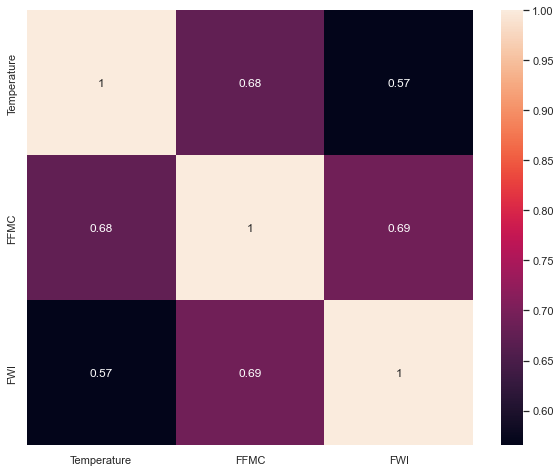

In [317]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df.corr(),annot=True)

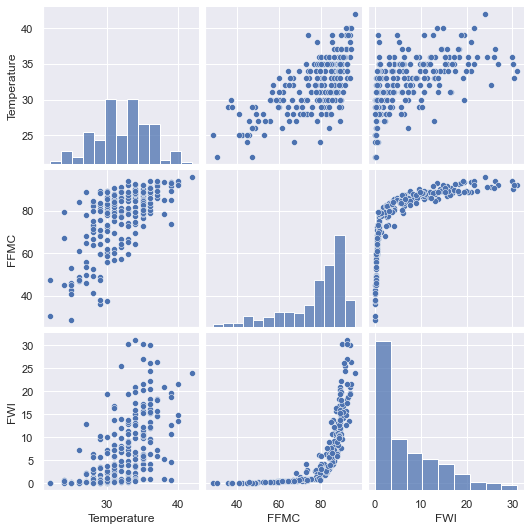

In [318]:
sns.pairplot(df)

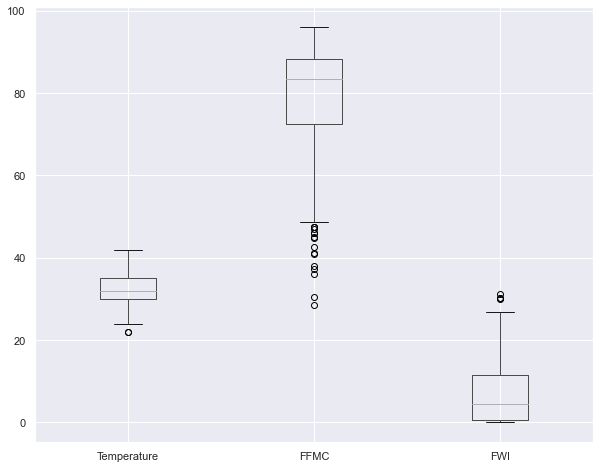

In [319]:
df.boxplot()
plt.show()

In [320]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
ohe = OneHotEncoder()

In [321]:
X = df.drop(['Temperature'], axis=1)
y = df['Temperature']

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [323]:
l=[]
for col in df.columns:
    if col == 'Temperature':
        continue
    l.append(col)
l

['FFMC', 'FWI']

In [324]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [325]:
scaler

StandardScaler()

In [326]:
X_train=scaler.fit_transform(X_train)

In [327]:
X_test=scaler.transform(X_test)

In [328]:
X_train

array([[-1.9850758 , -0.93203107],
       [ 0.99751787,  3.00965832],
       [ 0.2176654 , -0.55352448],
       [ 0.7717711 ,  0.73861873],
       [ 0.7717711 ,  1.70446315],
       [ 0.86754246,  1.05186557],
       [ 0.49813865,  0.77777459],
       [ 0.85386084,  0.30790433],
       [ 0.67599974,  0.22959262],
       [ 0.45025298, -0.43605691],
       [ 0.88806489,  1.06491752],
       [ 0.7102038 ,  0.34706019],
       [-0.54850546, -0.86677132],
       [ 0.5870692 , -0.3055374 ],
       [ 0.42973054, -0.21417373],
       [ 0.66915893,  0.34706019],
       [-2.06716554, -0.93203107],
       [ 0.7717711 ,  0.56894336],
       [ 0.48445703, -0.26638154],
       [ 0.73072623,  0.42537189],
       [-2.06716554, -0.93203107],
       [ 0.79913435,  0.32095628],
       [ 1.1411749 ,  2.48758025],
       [ 0.73072623,  1.24764485],
       [-1.21206414, -0.89287522],
       [-2.231345  , -0.93203107],
       [-0.637436  , -0.85371936],
       [ 0.71704461,  0.4775797 ],
       [ 0.72388542,

In [329]:
X_test

array([[ 0.62811407,  0.43842385],
       [ 0.61443244, -0.01839446],
       [ 0.68284056, -0.10975812],
       [ 0.17662053, -0.17501788],
       [ 0.53234271, -0.09670617],
       [ 0.34764081,  0.05991725],
       [ 0.79913435,  0.4514758 ],
       [ 0.14241647, -0.65794009],
       [ 0.47077541, -0.21417373],
       [-0.2680322 , -0.85371936],
       [ 0.35448162, -0.47521277],
       [ 0.10821242, -0.14891398],
       [ 0.75808948,  0.33400823],
       [ 1.11381166,  2.97050246],
       [ 0.81281597,  1.96550219],
       [-0.19278327, -0.84066741],
       [ 0.12873485, -0.44910886],
       [-2.75808746, -0.94508303],
       [ 0.60759163,  0.0990731 ],
       [ 0.54602433, -0.16196593],
       [ 0.56654677, -0.3055374 ],
       [ 0.23134702, -0.65794009],
       [ 0.80597516,  0.05991725],
       [-1.49937821, -0.90592717],
       [ 1.10697085,  1.78277486],
       [ 0.88122408,  0.89524215],
       [ 0.43657135, -0.01839446],
       [ 0.64179569,  0.43842385],
       [-2.39552447,

In [330]:
from sklearn.linear_model import LinearRegression

In [331]:
regression=LinearRegression()

In [332]:
regression

LinearRegression()

In [333]:
regression.fit(X_train,y_train)

LinearRegression()

In [334]:
## print the coefficients and the intercept
print(regression.coef_)

[2.20145543 0.59163896]


In [335]:
print(regression.intercept_)

32.13989637305699


In [336]:
## PRediction for the test data
reg_pred=regression.predict(X_test)

In [337]:
reg_pred

array([33.78205012, 33.48165913, 33.57820224, 32.4251712 , 33.25460998,
       32.9406615 , 34.16626569, 32.0641569 , 33.04957393, 31.0447418 ,
       32.63911747, 32.29001788, 34.00640885, 36.34936808, 35.09214217,
       31.21812099, 32.15759011, 25.50894182, 33.53609778, 33.24611925,
       33.206356  , 32.25993353, 33.94966413, 28.30310027, 35.63160242,
       34.60953204, 33.09010587, 33.8121696 , 26.30710809, 34.67903043,
       33.75504054, 29.87703537, 34.45313432, 31.82823267, 28.92827169,
       32.73604492, 31.37644045, 32.95149344, 29.28970547, 26.81952362,
       32.29389647, 33.11446017, 31.82435408, 28.47609512, 34.9439211 ,
       31.70349181, 33.56080129, 29.96005611, 31.94832625])

Text(0, 0.5, 'Test Predicted Data')

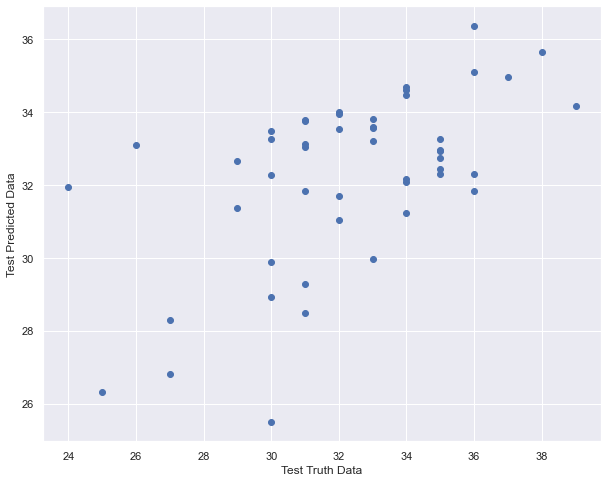

In [338]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [339]:
## residuals
residuals=y_test-reg_pred

In [340]:
residuals

24    -2.782050
6     -3.481659
154   -0.578202
212    2.574829
240   -3.254610
202    2.059339
193    4.833734
152    1.935843
9     -2.049574
113    0.955258
45    -3.639117
211    2.709982
229   -2.006409
173   -0.349368
82     0.907858
163    2.781879
234    1.842410
15     4.491058
66    -1.536098
129    1.753881
33    -0.206356
19    -2.259934
108   -1.949664
30    -1.303100
187    2.368398
167   -0.609532
10    -7.090106
73    -0.812170
93    -1.307108
157   -0.679030
111   -2.755041
219    0.122965
25    -0.453134
60     4.171767
18     1.071728
128    2.263955
96    -2.376440
198    2.048507
139    1.710295
242    0.180476
75     3.706104
117   -2.114460
112   -0.824354
16     2.523905
197    2.056079
67     0.296508
170   -0.560801
38     3.039944
243   -7.948326
Name: Temperature, dtype: float64

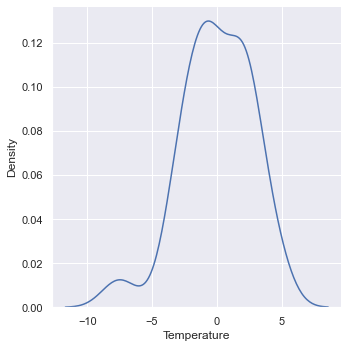

In [341]:
sns.displot(residuals,kind="kde")

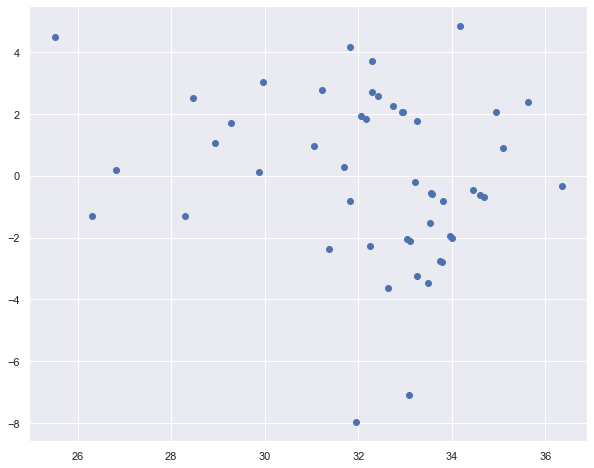

In [342]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

In [343]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.1939646545142
2.1496601048976878
2.6821567169936587


In [344]:
#R square and adjusted R square

In [345]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)


0.29717166603643397


In [346]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.2666139123858441

In [347]:
### Make a function for Linear Regression with default values
def linreg_model(xtrain, xtest):
    ### Initialize algorithm
    linreg = LinearRegression()

    ### Fit the data
    linreg.fit(xtrain, y_train)
    
    ### Evaluate the model
    y_pred = linreg.predict(xtest)
    
    print("R2:", r2_score(y_pred, y_test))
    print("MAE:", mean_absolute_error(y_pred, y_test))
    print("MSE:", mean_squared_error(y_pred, y_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))
    
    f, ax = plt.subplots(figsize=(11, 9))
    plt.scatter(y_pred, y_test)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Actual vs Predicted")
    
    return {"R2": r2_score(y_pred, y_test) * 100, "MAE": mean_absolute_error(y_pred, y_test), 
            "MSE": mean_squared_error(y_pred, y_test), "RMSE": np.sqrt(mean_squared_error(y_pred, y_test))}

R2: -0.3330737562424011
MAE: 2.1496601048976878
MSE: 7.1939646545142
RMSE: 2.6821567169936587


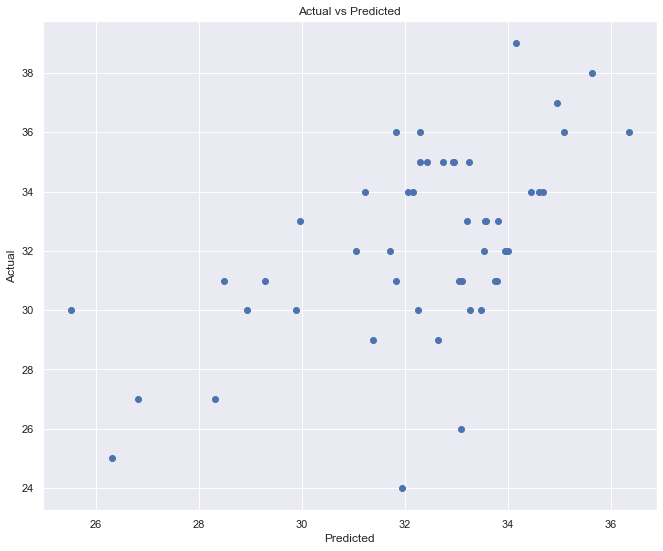

In [348]:
### Predict and get results
linreg_all_results = linreg_model(X_train, X_test)
